# 10) 단순회귀분석(csv)

In [1]:
import pandas as pd

df = pd.read_csv('c:/workspace3/data/regression_test.csv')
df

,x,y
0,1,1.619379
1,2,1.857290
2,3,2.628194
3,4,2.725426
4,5,3.498926
5,6,3.867042
6,7,4.934539
7,8,4.864829
8,9,5.241539
9,10,5.823689


In [2]:
import torch

X = torch.from_numpy(df['x'].values).unsqueeze(1).float()
y = torch.from_numpy(df['y'].values).unsqueeze(1).float()

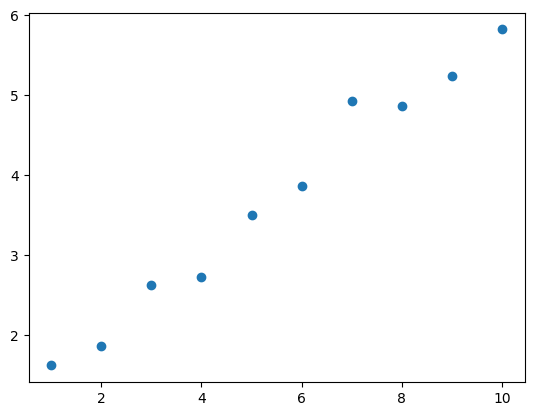

In [3]:
import matplotlib.pyplot as plt
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'
plt.scatter(X, y)
plt.show()

In [4]:
from torch import nn

# 단순한 신경망
model = nn.Linear(in_features=1, out_features=1, bias=True)
print(model)

# 초기 파라미터
print(model.weight)
print(model.bias)

Linear(in_features=1, out_features=1, bias=True)
Parameter containing:
tensor([[0.6367]], requires_grad=True)
Parameter containing:
tensor([0.1206], requires_grad=True)


In [5]:
criterion = nn.MSELoss()

optimizer = torch.optim.Adam(params=model.parameters(), lr=0.01)

print(model(X)) # predict(학습 전)

tensor([[0.7574],
        [1.3941],
        [2.0309],
        [2.6676],
        [3.3044],
        [3.9411],
        [4.5778],
        [5.2146],
        [5.8513],
        [6.4881]], grad_fn=<AddmmBackward0>)


In [7]:
for step in range(500):
    prediction = model(X)
    loss = criterion(input=prediction, target=y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(f"epoch: {step}, loss: {loss:.3f}")

epoch: 0, loss: 0.242
epoch: 1, loss: 0.227
epoch: 2, loss: 0.218
epoch: 3, loss: 0.214
epoch: 4, loss: 0.212
epoch: 5, loss: 0.210
epoch: 6, loss: 0.206
epoch: 7, loss: 0.200
epoch: 8, loss: 0.195
epoch: 9, loss: 0.191
epoch: 10, loss: 0.188
epoch: 11, loss: 0.186
epoch: 12, loss: 0.183
epoch: 13, loss: 0.180
epoch: 14, loss: 0.176
epoch: 15, loss: 0.172
epoch: 16, loss: 0.169
epoch: 17, loss: 0.165
epoch: 18, loss: 0.162
epoch: 19, loss: 0.159
epoch: 20, loss: 0.157
epoch: 21, loss: 0.154
epoch: 22, loss: 0.151
epoch: 23, loss: 0.148
epoch: 24, loss: 0.145
epoch: 25, loss: 0.142
epoch: 26, loss: 0.139
epoch: 27, loss: 0.137
epoch: 28, loss: 0.134
epoch: 29, loss: 0.132
epoch: 30, loss: 0.129
epoch: 31, loss: 0.126
epoch: 32, loss: 0.124
epoch: 33, loss: 0.122
epoch: 34, loss: 0.119
epoch: 35, loss: 0.117
epoch: 36, loss: 0.115
epoch: 37, loss: 0.113
epoch: 38, loss: 0.111
epoch: 39, loss: 0.108
epoch: 40, loss: 0.106
epoch: 41, loss: 0.104
epoch: 42, loss: 0.103
epoch: 43, loss: 0.10

In [8]:
print(model(X)) # predict(학습 후)

tensor([[1.5323],
        [2.0153],
        [2.4984],
        [2.9815],
        [3.4645],
        [3.9476],
        [4.4307],
        [4.9138],
        [5.3968],
        [5.8799]], grad_fn=<AddmmBackward0>)


In [9]:
def mse_loss(preds, trues):  
    return torch.sum((preds - trues)**2) / preds.view(-1).shape[0]

mse_loss(model(X), y)

tensor(0.0406, grad_fn=<DivBackward0>)

In [10]:
loss.data.item(), model.weight.data.item(), model.bias.data.item()

(0.04061826691031456, 0.4830736815929413, 1.0491801500320435)

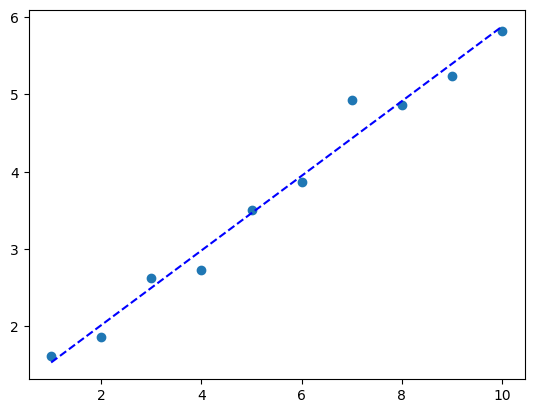

In [11]:
def display_results(model, x, y):
    pred = model(x)

    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), pred.data.numpy(), 'b--')
    plt.show()

display_results(model, X, y)